In [1]:
import pandas as pd


In [2]:
file_path = '/content/pizza_data.csv'
data = pd.read_csv(file_path)

In [15]:
pip install matplotlib seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data.head()

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8


In [4]:
from itertools import product

In [5]:
attributes = {
    'brand': data['brand'].unique(),
    'price': data['price'].unique(),
    'weight': data['weight'].unique(),
    'crust': data['crust'].unique(),
    'cheese': data['cheese'].unique(),
    'size': data['size'].unique(),
    'toppings': data['toppings'].unique(),
    'spicy': data['spicy'].unique()
}


In [6]:
profiles = list(product(*attributes.values()))
profiles_df = pd.DataFrame(profiles, columns=attributes.keys())

In [7]:
profiles_df.head()

,brand,price,weight,crust,cheese,size,toppings,spicy
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal
1,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,extra
2,Dominos,$1.00,100g,thin,Mozzarella,regular,mushroom,normal
3,Dominos,$1.00,100g,thin,Mozzarella,regular,mushroom,extra
4,Dominos,$1.00,100g,thin,Mozzarella,large,paneer,normal


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [9]:
encoder = OneHotEncoder()
encoded_profiles = encoder.fit_transform(data.drop('ranking', axis=1))


In [10]:
X = encoded_profiles.toarray()
y = data['ranking']

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
part_worths = model.coef_

In [13]:
attributes_list = encoder.get_feature_names_out()
part_worths_df = pd.DataFrame({
    'Attribute': attributes_list,
    'Part-Worth': part_worths
})

In [14]:
part_worths_df.sort_values(by='Part-Worth', ascending=False)

,Attribute,Part-Worth
8,weight_100g,5.000000e+00
9,weight_200g,2.000000e+00
12,crust_thick,1.750000e+00
18,toppings_mushroom,1.125000e+00
4,price_$1.00,7.500000e-01
20,spicy_extra,7.500000e-01
17,size_regular,2.500000e-01
15,cheese_Mozzarella,2.500000e-01
3,brand_Pizza hut,2.500000e-01
0,brand_Dominos,2.886580e-15


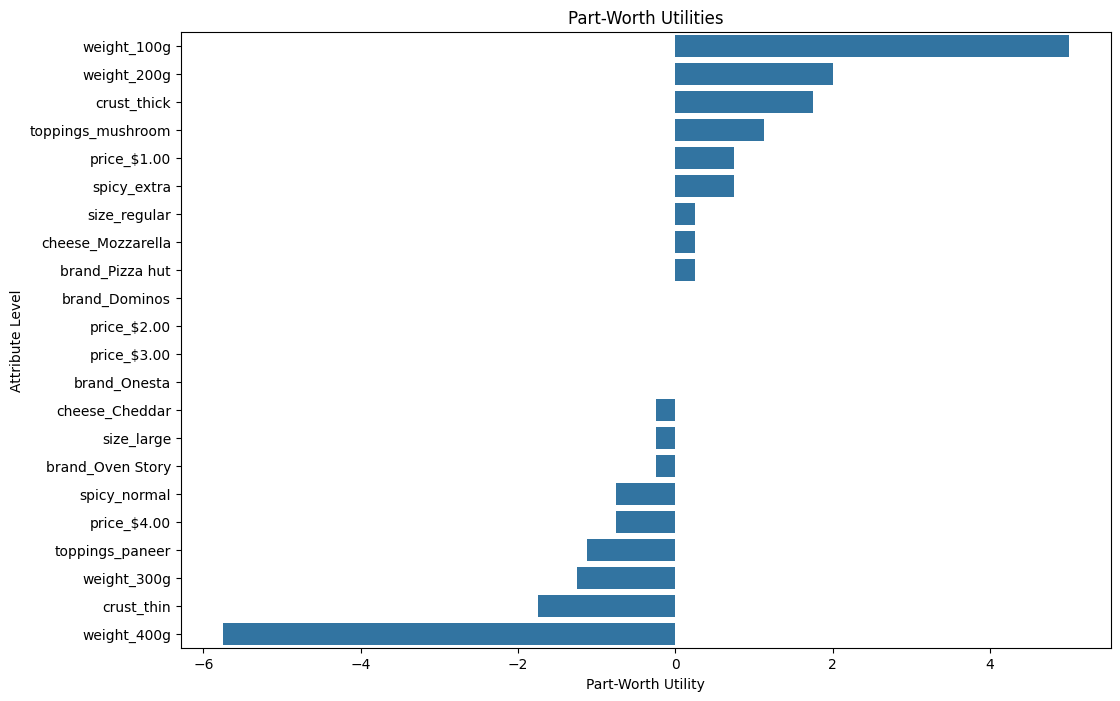

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Part-Worth', y='Attribute', data=part_worths_df.sort_values(by='Part-Worth', ascending=False))
plt.title('Part-Worth Utilities')
plt.xlabel('Part-Worth Utility')
plt.ylabel('Attribute Level')
plt.show()

In [18]:
attribute_ranges = part_worths_df.groupby(part_worths_df['Attribute'].str.extract(r'([a-zA-Z_]+)_')[0]).agg({'Part-Worth': lambda x: x.max() - x.min()})

In [19]:
total_range = attribute_ranges['Part-Worth'].sum()
attribute_ranges['Relative Importance'] = attribute_ranges['Part-Worth'] / total_range * 100

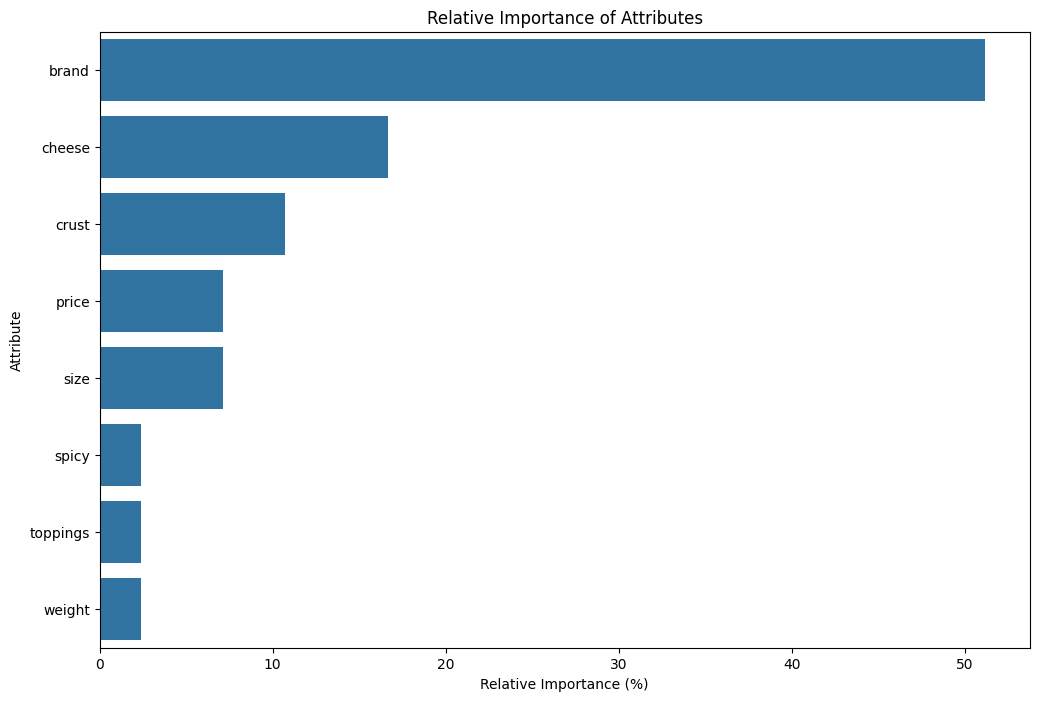

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Relative Importance', y=attribute_ranges.index, data=attribute_ranges.sort_values(by='Relative Importance', ascending=False))
plt.title('Relative Importance of Attributes')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Attribute')
plt.show()